# 4. Логистическая регрессия. Практика

In [82]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn.model_selection import train_test_split #разделение выборки
from sklearn import preprocessing #предобработка
%matplotlib inline
plt.style.use('seaborn')

In [83]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [84]:
churn_data = churn_data[churn_data['Geography'] == 'Germany']
churn_data.shape
# (2509, 14)

(2509, 14)

In [85]:
churn_data = churn_data.drop(['Geography', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
churn_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Female,29,4,115046.74,4,1,0,119346.88,1
15,616,Male,45,3,143129.41,2,0,1,64327.26,0
16,653,Male,58,1,132602.88,1,1,0,5097.67,1
26,756,Male,36,2,136815.64,1,1,1,170041.95,0
28,574,Female,43,3,141349.43,1,1,1,100187.43,0


In [86]:
churn_data.isnull().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [87]:
churn_data['BalanceSalaryRatio'] = churn_data['Balance']/churn_data['EstimatedSalary']
churn_data['TenureByAge'] = churn_data['Tenure']/(churn_data['Age'])
churn_data['CreditScoreGivenAge'] = churn_data['CreditScore']/(churn_data['Age'])

In [88]:
churn_data['Gender'] = churn_data['Gender'].apply(lambda x: 1 if x=='Male' else 0)
churn_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
7,376,0,29,4,115046.74,4,1,0,119346.88,1,0.963969,0.137931,12.965517
15,616,1,45,3,143129.41,2,0,1,64327.26,0,2.225020,0.066667,13.688889
16,653,1,58,1,132602.88,1,1,0,5097.67,1,26.012449,0.017241,11.258621
26,756,1,36,2,136815.64,1,1,1,170041.95,0,0.804599,0.055556,21.000000
28,574,0,43,3,141349.43,1,1,1,100187.43,0,1.410850,0.069767,13.348837


In [89]:
X = churn_data.drop("Exited", axis=1)
y = churn_data["Exited"]

In [90]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[5.20000000e-02, 0.00000000e+00, 1.66666667e-01, ...,
        7.26732600e-05, 2.75862069e-01, 1.70146116e-01],
       [5.32000000e-01, 1.00000000e+00, 4.09090909e-01, ...,
        1.91478154e-04, 1.33333333e-01, 1.88106386e-01],
       [6.06000000e-01, 1.00000000e+00, 6.06060606e-01, ...,
        2.43251754e-03, 3.44827586e-02, 1.27766348e-01],
       ...,
       [6.46000000e-01, 1.00000000e+00, 4.39393939e-01, ...,
        4.89829532e-04, 4.25531915e-02, 2.03754830e-01],
       [7.28000000e-01, 1.00000000e+00, 2.27272727e-01, ...,
        4.33273386e-05, 1.81818182e-01, 3.85430667e-01],
       [8.44000000e-01, 1.00000000e+00, 3.63636364e-01, ...,
        5.80009051e-05, 1.42857143e-01, 3.04603523e-01]])

In [91]:
y.value_counts(normalize=True)

0    0.675568
1    0.324432
Name: Exited, dtype: float64

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=0)

print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1881, 12)
Test shape: (628, 12)


In [93]:
print('Train :', y_train.value_counts(normalize=True))
print('\n')
print('Test :', y_test.value_counts(normalize=True))

Train : 0    0.675704
1    0.324296
Name: Exited, dtype: float64


Test : 0    0.675159
1    0.324841
Name: Exited, dtype: float64


Задание 4.2

Обучите модель логистической регрессии на тренировочных данных. Используйте в качестве алгоритма минимизации функции потерь (параметр solver) стохастический градиентный спуск. В качестве значения параметра random_state возьмите 42 для воспроизводимости результатов. Остальные параметры оставьте по умолчанию.

Предскажите метки классов для тренировочной и тестовой выборок.

Чему равно значение целевой метрики на тренировочной и тестовой выборках? Ответ приведите с точностью до двух знаков после точки-разделителя.

In [94]:
log_reg = linear_model.LogisticRegression(solver='sag', random_state=42)
log_reg.fit(X_train, y_train)

y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

print(round(metrics.f1_score(y_train, y_train_pred),2))
print(round(metrics.f1_score(y_test, y_test_pred),2))

0.49
0.47


Задание 4.3

Сгенерируйте полиномиальные признаки степени 3 для тренировочной и тестовой выборок. Используйте класс PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Чему равно количество признаков в тренировочной выборке?

In [95]:
poly = preprocessing.PolynomialFeatures(degree = 3, include_bias=False)
poly.fit(X_train, y_train)

X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)
print(X_train_poly.shape)

(1881, 454)


Задание 4.4

Обучите модель логистической регрессии на полиномиальных признаках.

Используйте в качестве алгоритма минимизации функции потерь (параметр solver) стохастический градиентный спуск. Параметру random_state выставите значение 42 для воспроизводимости результатов. Увеличьте максимальное количество итераций, выделяемых на сходимость (параметр max_iter), до 1000.

Остальные параметры оставьте по умолчанию.

Предскажите метки классов для тренировочной и тестовой выборок.

Чему равно значение целевой метрики на тренировочной и тестовой выборках для модели, обученной на полиномиальных признаках? Ответ приведите с точностью до двух знаков после точки-разделителя.

In [96]:
lr_model_poly = linear_model.LogisticRegression(solver='sag', random_state=42, max_iter=1000)
lr_model_poly.fit(X_train_poly, y_train)
#Выводим значения метрик
y_train_predict_poly = lr_model_poly.predict(X_train_poly)
print('Train: {:.2f}'.format(metrics.f1_score(y_train, y_train_predict_poly)))
y_test_predict_poly = lr_model_poly.predict(X_test_poly)
print('Test: {:.2f}'.format(metrics.f1_score(y_test, y_test_predict_poly)))

Train: 0.66
Test: 0.64


Задание 4.5

Попробуйте подобрать значение порога вероятности, при котором наблюдается наибольшее значение целевой метрики на тестовой выборке. Используйте логистическую регрессию, обученную на полиномиальных признаках из предыдущего задания.

In [110]:
thresholds = np.arange(0.1, 1, 0.05)

y_test_pred_proba = lr_model_poly.predict_proba(X_test_poly)[:,1]
y_test_pred_proba = pd.Series(y_test_pred_proba)

f1_scores = []

for threshold in thresholds:
    y_test_pred = y_test_pred_proba.apply(lambda x: 1 if x>threshold else 0)
    f1_scores.append(metrics.f1_score(y_test, y_test_pred))


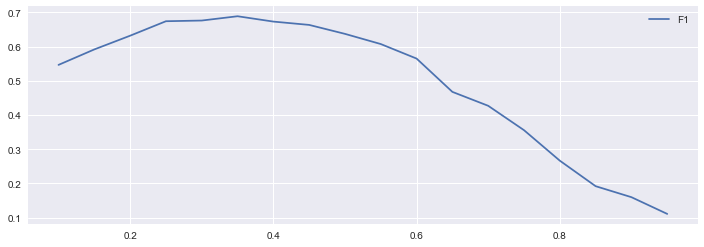

In [114]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(thresholds, f1_scores, label='F1')
ax.legend()

Задание 4.6

Сделайте предсказание классов с подобранным оптимальным порогом вероятности. Чему равно значение целевой метрики на тестовой выборке? Ответ приведите с точностью до двух знаков после точки-разделителя.

In [116]:
#Выводим значения метрик
y_test_pred_opt = y_test_pred_proba.apply(lambda x: 1 if x>0.35 else 0)
print('Test threshold 0.35: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred_opt)))

Test threshold 0.35: 0.69
